# Assignment 3
github Link: 

### 1)  Visualize the categories of your target variable and describe the dataset generally (the data includes news articles from the BBC news.)  A simple description is fine.

In [1]:
import pandas as pd
df=pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")

In [2]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
category    2225 non-null object
text        2225 non-null object
dtypes: object(2)
memory usage: 34.8+ KB


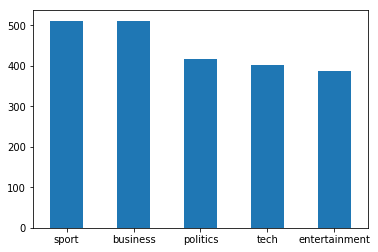

In [5]:
import matplotlib.pyplot as plt
df['category'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

There are five categories of the target variable 'category': sport, business, politics, tech and entertainment. Sport and business are the two largest categories with around 500 data, while politics, tech and entertainment have smaller data of around 400. 

### 2) Preprocess your data such that each document in the data is represented as a sequence of equal length.

In [6]:
from sklearn.model_selection import train_test_split
X=df['text']
y=df['category']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
print X_train.shape

(1668,)


In [48]:
y_train.values.reshape(-1, 1)

array([['politics'],
       ['business'],
       ['tech'],
       ...,
       ['business'],
       ['entertainment'],
       ['tech']], dtype=object)

In [109]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.preprocessing import OneHotEncoder

maxlen = 500
training_samples = 1400
validation_samples = 300
max_words = 2500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train) 

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

one_hot_enc = OneHotEncoder()
one_hot_enc.fit(y_train.values.reshape(-1, 1))
labels = one_hot_enc.transform(y_train.values.reshape(-1, 1)).toarray()

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train_train = data[:training_samples] #200 words
y_train_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Found 26566 unique tokens.
('Shape of data tensor:', (1668, 500))
('Shape of label tensor:', (1668, 5))


### 3)  Use the data to fit separate models to each of the following architectures:
### A. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)

In [110]:
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()

model.add(Embedding(2500, 8, input_length=maxlen))

model.add(Flatten())


model.add(Dense(5, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train_train, y_train_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 500, 8)            20000     
_________________________________________________________________
flatten_15 (Flatten)         (None, 4000)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 5)                 20005     
Total params: 40,005
Trainable params: 40,005
Non-trainable params: 0
_________________________________________________________________
Train on 1120 samples, validate on 280 samples
Epoch 1/10
1120/1120 [==============================] - 0s 185us/step - loss: 0.6838 - acc: 0.6482 - val_loss: 0.6737 - val_acc: 0.7493
Epoch 2/10
1120/1120 [==============================] - 0s 71us/step - loss: 0.6628 - acc: 0.7646 - val_loss: 0.6468 - val_acc: 0.7857
Epoch 3/10
1120/1120 [==============================] - 0s 70

### B. A model using an Embedding layer with Conv1d Layers

In [112]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='sigmoid')) 
model.add(layers.MaxPooling1D(5)) #
model.add(layers.Conv1D(32, 7, activation='sigmoid'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train_train, y_train_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 500, 128)          320000    
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 98, 32)            0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_14 (Glo (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 5)                 165       
Total params: 356,069
Trainable params: 356,069
Non-trainable params: 0
_______________________________________________

### C. A model using an Embedding layer with one sequential layer (LSTM or GRU)

In [117]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(2500, 32))
model.add(LSTM(32))
model.add(Dense(5, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train_train, y_train_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 1120 samples, validate on 280 samples
Epoch 1/10
1120/1120 [==============================] - 9s 8ms/step - loss: 0.6036 - acc: 0.7804 - val_loss: 0.4976 - val_acc: 0.8000
Epoch 2/10
1120/1120 [==============================] - 9s 8ms/step - loss: 0.5003 - acc: 0.8000 - val_loss: 0.5023 - val_acc: 0.8000
Epoch 3/10
1120/1120 [==============================] - 8s 7ms/step - loss: 0.4954 - acc: 0.8000 - val_loss: 0.4981 - val_acc: 0.8000
Epoch 4/10
1120/1120 [==============================] - 9s 8ms/step - loss: 0.4878 - acc: 0.8000 - val_loss: 0.4879 - val_acc: 0.8000
Epoch 5/10
1120/1120 [==============================] - 9s 8ms/step - loss: 0.4567 - acc: 0.8023 - val_loss: 0.4752 - val_acc: 0.8021
Epoch 6/10
1120/1120 [==============================] - 9s 8ms/step - loss: 0.4376 - acc: 0.8052 - val_loss: 0.4374 - val_acc: 0.8029
Epoch 7/10
1120/1120 [==============================] - 8s 8ms/step - loss: 0.3852 - acc: 0.8241 - val_loss: 0.3904 - val_acc: 0.8079
Epoch 8/10
1120

### D. A model using an Embedding layer with stacked sequential layers (LSTM or GRU)

In [118]:
model = Sequential()
model.add(Embedding(2500, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train_train, y_train_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 1120 samples, validate on 280 samples
Epoch 1/10
1120/1120 [==============================] - 37s 33ms/step - loss: 0.5631 - acc: 0.7930 - val_loss: 0.5008 - val_acc: 0.8000
Epoch 2/10
1120/1120 [==============================] - 34s 30ms/step - loss: 0.5005 - acc: 0.8000 - val_loss: 0.5005 - val_acc: 0.8000
Epoch 3/10
1120/1120 [==============================] - 34s 30ms/step - loss: 0.4999 - acc: 0.8000 - val_loss: 0.4989 - val_acc: 0.8000
Epoch 4/10
1120/1120 [==============================] - 34s 30ms/step - loss: 0.5000 - acc: 0.8000 - val_loss: 0.5004 - val_acc: 0.8000
Epoch 5/10
1120/1120 [==============================] - 31s 28ms/step - loss: 0.4850 - acc: 0.8000 - val_loss: 0.4457 - val_acc: 0.8000
Epoch 6/10
1120/1120 [==============================] - 31s 28ms/step - loss: 0.4321 - acc: 0.8018 - val_loss: 0.4053 - val_acc: 0.8236
Epoch 7/10
1120/1120 [==============================] - 31s 27ms/step - loss: 0.3882 - acc: 0.8030 - val_loss: 0.3966 - val_acc: 0.8000
E

### E. A model using an Embedding layer with bidirectional sequential layers

In [119]:
model = Sequential()
model.add(layers.Embedding(2500, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(5, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train_train, y_train_train, epochs=10, batch_size=128, validation_split=0.2)



Train on 1120 samples, validate on 280 samples
Epoch 1/10
1120/1120 [==============================] - 6s 5ms/step - loss: 0.6798 - acc: 0.7241 - val_loss: 0.6603 - val_acc: 0.8000
Epoch 2/10
1120/1120 [==============================] - 4s 4ms/step - loss: 0.6326 - acc: 0.8000 - val_loss: 0.5791 - val_acc: 0.8000
Epoch 3/10
1120/1120 [==============================] - 4s 4ms/step - loss: 0.5281 - acc: 0.8000 - val_loss: 0.5088 - val_acc: 0.8000
Epoch 4/10
1120/1120 [==============================] - 4s 4ms/step - loss: 0.5051 - acc: 0.8000 - val_loss: 0.4986 - val_acc: 0.8000
Epoch 5/10
1120/1120 [==============================] - 4s 4ms/step - loss: 0.4956 - acc: 0.8000 - val_loss: 0.4979 - val_acc: 0.8000
Epoch 6/10
1120/1120 [==============================] - 4s 4ms/step - loss: 0.4939 - acc: 0.8000 - val_loss: 0.4980 - val_acc: 0.8000
Epoch 7/10
1120/1120 [==============================] - 4s 4ms/step - loss: 0.4902 - acc: 0.8000 - val_loss: 0.4963 - val_acc: 0.8000
Epoch 8/10
1120

### F. Now retrain your best model from C, D, and E using dropout (you may need to increase epochs!).

In [120]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_test)
sequences = tokenizer.texts_to_sequences(X_test) 

word_index = tokenizer.word_index

X_test = pad_sequences(sequences, maxlen=maxlen)

one_hot_enc = OneHotEncoder()
one_hot_enc.fit(y_test.values.reshape(-1, 1))
y_test = one_hot_enc.transform(y_test.values.reshape(-1, 1)).toarray()

In [123]:
model = Sequential()
model.add(Embedding(2500, 32))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dense(5, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train_train, y_train_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

score, acc = model.evaluate(X_test, y_test,
                            batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)

Train on 1120 samples, validate on 280 samples
Epoch 1/10
1120/1120 [==============================] - 17s 15ms/step - loss: 0.5257 - acc: 0.7900 - val_loss: 0.4968 - val_acc: 0.8000
Epoch 2/10
1120/1120 [==============================] - 16s 14ms/step - loss: 0.5000 - acc: 0.8000 - val_loss: 0.4994 - val_acc: 0.8000
Epoch 3/10
1120/1120 [==============================] - 16s 14ms/step - loss: 0.4957 - acc: 0.8000 - val_loss: 0.4899 - val_acc: 0.8000
Epoch 4/10
1120/1120 [==============================] - 16s 14ms/step - loss: 0.4788 - acc: 0.8011 - val_loss: 0.4462 - val_acc: 0.8086
Epoch 5/10
1120/1120 [==============================] - 17s 15ms/step - loss: 0.4443 - acc: 0.8125 - val_loss: 0.4342 - val_acc: 0.8186
Epoch 6/10
1120/1120 [==============================] - 16s 14ms/step - loss: 0.3973 - acc: 0.8307 - val_loss: 0.3812 - val_acc: 0.8393
Epoch 7/10
1120/1120 [==============================] - 16s 14ms/step - loss: 0.3620 - acc: 0.8443 - val_loss: 0.3636 - val_acc: 0.8436
E

### 4) Discuss 1) which model(s) performed best and speculate about 2) how you might try to further improve the predictive power of your model (e.g. Glove embeddings? More layers? Combining Conv1D with LSTM layers? More LSTM hidden nodes?)

LSTM model using dropout performed best among all the models. The predictive power may be improved through glove embeddings which provides a suite of pre-trained word embeddings. Glove embeddings measure the similarity of the hidden factors between words to predict their co-occurrence count. It may help improve LSTM model performance